<div class="alert alert-block alert-warning">
<h1><center><b>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</b></h1></center>
<h1><center><b>Final Project</b></h1></center>
</div>

<div class="alert alert-block alert-info">
<b>Group_ID: 9<b>
<br></br>
<b>Group Members:</b>  

1. Dhruv B00891974
2. Mudra 
3. Arihant B00917961
4. Abhinav Acharya B00929073
</div>


<div class="alert alert-block alert-warning">

<h1><center><b>1. Dataset Information </b></h1>

<div class="alert alert-block alert-info">
<b>Dataset 1 Name:</b>  result_spotify_dataset.csv

<b>Link to the Dataset 1:</b> https://www.kaggle.com/datasets/andrewmvd/spotify-playlists?select=spotify_dataset.csv

<b>Dataset 1 Description:</b> 
This dataset is based on the subset of users in the #nowplaying dataset who publish their #nowplaying tweets via Spotify. In principle, the dataset holds users, their playlists and the tracks contained in these playlists.
</div>

<div class="alert alert-block alert-info">
<b>Dataset 2 Name:</b>  train.csv

<b>Link to the Dataset 2:</b> https://www.kaggle.com/datasets/purumalgi/music-genre-classification/data?select=train.csv

<b>Dataset 2 Description:</b> 
This Dataset consists of 17,996 rows, each representing a unique song, with 17 columns detailing various attributes of the songs. These attributes include the artist name, track name, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration in milliseconds, and time signature. The target variable is ‘Class’, which categorizes each song into one of several genres such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, and Bollywood. The test dataset, used to evaluate the model’s performance, contains 7,713 rows with the same 16 feature columns as the training set.
</div>

<div class="alert alert-block alert-info">
<b>Dataset 3 Name:</b>  SpotifyFeatures.csv

<b>Link to the Dataset 3:</b> https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

<b>Dataset 3 Description:</b> 
This Dataset analyzes the behavior between valence and all the measures that Spotify API gives so I got approximately 10,000 per genre. There are 26 genres so it is a total of 232,725 tracks
</div>


<div class="alert alert-block alert-warning">

<h1><center><b>2. Task Information</b></h1>


<div class="alert alert-block alert-info">
<h4> Task Goal: <code> Provide a short one line goal of the task here </code></h4>
<h4> Task Description: </h4>
    <code>Provide a short description of the goal you are trying to achieve. What is your goal, why it's important, what features you have and how you are using it in the task, what ML models you are using and why. etc.</code>
</div>

<div class="alert alert-block alert-info">
<h4> Task Goal: <code> Provide a short one line goal of the task here </code></h4>
<h4> Task Description: </h4>
    <code>Provide a short description of the goal you are trying to achieve. What is your goal, why it's important, what features you have and how you are using it in the task, what ML models you are using and why. etc.</code>
</div>

<div class="alert alert-block alert-info">
<h4> Task Goal: <code> Provide a short one line goal of the task here </code></h4>
<h4> Task Description: </h4>
    <code>Provide a short description of the goal you are trying to achieve. What is your goal, why it's important, what features you have and how you are using it in the task, what ML models you are using and why. etc.</code>
</div>

<div class="alert alert-block alert-warning">

<h1><center><b>3. Task Implementation: Coding</b></h1>

<div class="alert alert-block alert-info">
<b>Importing Libraries</b></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_auc_score
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics.pairwise import cosine_similarity
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<div class="alert alert-block alert-warning">

<h3><center><b>3.1. USER MATCHING USING COLLABORATIVE AND CONTENT-BASED FILTERING</b></h3>

<div class="alert alert-block alert-info">
Loading the dataset</div>

In [2]:
spotify_dataset_path = r'result_spotify_dataset.csv'
train_dataset_path = r'train.csv'

spotify_dataset = pd.read_csv(spotify_dataset_path)
train_dataset = pd.read_csv(train_dataset_path)

<div class="alert alert-block alert-info">

<h5><b>3.1.1 EDA</b></h5>

</div>

<div class="alert alert-block alert-info">

Descriptive Analysis

</div>

In [3]:
print("EDA:")
print('\nSpotify Data:')
display(spotify_dataset.head())
print("Length of spotify dataset:", len(spotify_dataset))
display(spotify_dataset.describe())
display(spotify_dataset.isna().sum())
display(pd.DataFrame({'Column': spotify_dataset.columns, 'DType': [spotify_dataset[col].dtype for col in spotify_dataset.columns], 'NUniques': [spotify_dataset[col].nunique() for col in spotify_dataset.columns]}))

print('\nTrain Data:')
display(train_dataset.head())
print("Length of train dataset:", len(train_dataset))
display(train_dataset.describe())
display(train_dataset.isna().sum())
display(pd.DataFrame({'Column': train_dataset.columns, 'DType': [train_dataset[col].dtype for col in train_dataset.columns], 'NUniques': [train_dataset[col].nunique() for col in train_dataset.columns]}))

EDA:

Spotify Data:


user_id   artistname        trackname  \
0  c1a6910ecac9fd5e5348326675fb6ca6  Jon Hopkins   Abandon Window   
1  c1a6910ecac9fd5e5348326675fb6ca6      Grouper         Clearing   
2  c1a6910ecac9fd5e5348326675fb6ca6   Com Truise           Closed   
3  c1a6910ecac9fd5e5348326675fb6ca6    Radiohead            Codex   
4  c1a6910ecac9fd5e5348326675fb6ca6  Nina Simone  Cotton Eyed Joe   

  playlistname                 song_id  danceability  energy  key  loudness  \
0        CHILL  5BKp7nLEzAtazOxYla2sBr         0.063  0.1730  6.0   -26.199   
1        CHILL  3IL43TRkEnh4buGOZ1Brb5         0.230  0.0432  6.0   -23.066   
2        CHILL  1z2iz13gYpqnH4IwUQsSLx         0.623  0.5200  2.0    -7.926   
3        CHILL  6ttYF5VadzTssGV2i1Q08T         0.346  0.1280  2.0   -17.536   
4        CHILL  3d5Mw0esNjnh123xyy48IF         0.421  0.0820  0.0   -18.893   

   mode  ...  instrumentalness  liveness  valence    tempo            type  \
0   1.0  ...          0.836000    0.0863   0.1120   68.963  audio_features   
1   1.0  ...          0.932000    0.1050   0.1360   89.582  audio_features   
2   1.0  ...          0.839000    0.0899   0.1720  172.051  audio_features   
3   0.0  ...          0.760000    0.1300   0.0654   58.996  audio_features   
4   1.0  ...          0.000209    0.1280   0.2040   72.529  audio_features   

   duration_ms time_signature  \
0     297493.0            3.0   
1     281680.0            4.0   
2     184000.0            4.0   
3     287067.0            4.0   
4     171280.0            4.0   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5BKp...   
1  https://api.spotify.com/v1/audio-analysis/3IL4...   
2  https://api.spotify.com/v1/audio-analysis/1z2i...   
3  https://api.spotify.com/v1/audio-analysis/6ttY...   
4  https://api.spotify.com/v1/audio-analysis/3d5M...   

                                    uri                      id  
0  spotify:track:5BKp7nLEzAtazOxYla2sBr  5BKp7nLEzAtazOxYla2sBr  
1  spotify:track:3IL43TRkEnh4buGOZ1Brb5  3IL43TRkEnh4buGOZ1Brb5  
2  spotify:track:1z2iz13gYpqnH4IwUQsSLx  1z2iz13gYpqnH4IwUQsSLx  
3  spotify:track:6ttYF5VadzTssGV2i1Q08T  6ttYF5VadzTssGV2i1Q08T  
4  spotify:track:3d5Mw0esNjnh123xyy48IF  3d5Mw0esNjnh123xyy48IF  

[5 rows x 22 columns]

Length of spotify dataset: 28469


danceability        energy           key      loudness          mode  \
count  28469.000000  28469.000000  28469.000000  28469.000000  28469.000000   
mean       0.546875      0.641947      5.186132     -8.442115      0.655836   
std        0.172200      0.247924      3.570595      4.843543      0.475103   
min        0.000000      0.000000      0.000000    -60.000000      0.000000   
25%        0.432000      0.481000      2.000000    -10.119000      0.000000   
50%        0.554000      0.693000      5.000000     -7.226000      1.000000   
75%        0.671000      0.845000      8.000000     -5.293000      1.000000   
max        0.988000      0.999000     11.000000      2.017000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  28469.000000  28469.000000      28469.000000  28469.000000   
mean       0.076269      0.266104          0.150150      0.202869   
std        0.098086      0.320394          0.294507      0.180680   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.033900      0.010300          0.000000      0.095600   
50%        0.044100      0.101000          0.000271      0.127000   
75%        0.071900      0.464000          0.075700      0.258000   
max        0.961000      0.996000          1.000000      0.999000   

            valence        tempo   duration_ms  time_signature  
count  28469.000000  28469.00000  2.846900e+04     28469.00000  
mean       0.480868    121.76861  2.438535e+05         3.89824  
std        0.254482     28.67606  9.741088e+04         0.43739  
min        0.000000      0.00000  3.329000e+03         0.00000  
25%        0.275000    100.42200  1.960000e+05         4.00000  
50%        0.473000    120.85000  2.317730e+05         4.00000  
75%        0.684000    138.70400  2.737330e+05         4.00000  
max        0.993000    238.89500  4.057195e+06         5.00000

user_id             0
artistname          0
trackname           0
playlistname        0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
analysis_url        0
uri                 0
id                  0
dtype: int64

Column    DType  NUniques
0            user_id   object       250
1         artistname   object      6185
2          trackname   object     21454
3       playlistname   object      1078
4            song_id   object     22179
5       danceability  float64       920
6             energy  float64      1415
7                key  float64        12
8           loudness  float64     11099
9               mode  float64         2
10       speechiness  float64      1295
11      acousticness  float64      3965
12  instrumentalness  float64      4573
13          liveness  float64      1609
14           valence  float64      1491
15             tempo  float64     17817
16              type   object         1
17       duration_ms  float64     15249
18    time_signature  float64         5
19      analysis_url   object     22179
20               uri   object     22179
21                id   object     22179


Train Data:


Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

Length of train dataset: 17996


Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Column    DType  NUniques
0          Artist Name   object      9149
1           Track Name   object     15129
2           Popularity  float64       100
3         danceability  float64       909
4               energy  float64      1208
5                  key  float64        11
6             loudness  float64      9002
7                 mode    int64         2
8          speechiness  float64      1194
9         acousticness  float64      3930
10    instrumentalness  float64      4253
11            liveness  float64      1459
12             valence  float64      1320
13               tempo  float64     13562
14  duration_in min/ms  float64     14121
15      time_signature    int64         4
16               Class    int64        11


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.1.2 Pre-processing</b></h5>

</div>

<div class="alert alert-block alert-info">

Feature selection & encoding

</div>

- user_id: The unique identifier of the user who listened to the song.

- artistname: The name of the artist who performed the song.

- trackname: The name of the song.

- playlistname: The name of the playlist in which the song is included.

- song_id: The unique identifier of the song in Spotify.

- danceability: A measure of how suitable a song is for dancing based on tempo, rhythm, and beat strength.

- energy: A measure of how intense and active a song is based on dynamic range, loudness, and timbre. 

- key: The estimated overall key of the song based on the pitch class notation.

- loudness: The overall loudness of a song in decibels (dB).

- mode: The modality (major or minor) of a song based on the pitch class notation. This is a float type column with 2 unique values: 0.0 for minor and 1.0 for major.

- speechiness: A measure of how much spoken words are present in a song. 

- acousticness: A measure of how acoustic a song is based on the presence of acoustic sounds. 

- instrumentalness: A measure of how instrumental a song is based on the absence of vocal sounds. 

- liveness: A measure of how live a song is based on the presence of audience sounds. 

- valence: A measure of how positive or negative a song is based on the musical mood. 

- tempo: The overall tempo of a song in beats per minute (BPM). 

- type: The type of the Spotify object. For this dataset, it should be ‘audio_features’.

- duration_ms: The duration of a song in milliseconds. 

- time_signature: The estimated number of beats in each bar of a song.

- analysis_url: The URL to access the detailed audio analysis of a song provided by Spotify.

- uri: The Spotify URI (Uniform Resource Identifier) of a song. 

- id: The Spotify ID of a song.

We wont be needing `type`, `analysis_url`, `uri`, `id`, `song_id` for any of the visual analysis or model training tasks. We can drop them.

In [4]:
columns_to_drop =['analysis_url', 'type', 'uri', 'id', 'song_id']

spotify_dataset.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(spotify_dataset.shape)


(28469, 17)


`user_id` and `artistname` could be used in training the models or data analysis or visualization as:

- Songs of an artist might have same features in common,
- User might have similar taste and is more likely to choose a song with similar metrics on basic intuition.

So we convert these textual columns into numerical ones.

In [5]:
def mapper(col):
    coded_dict = dict()
    cter = 1
    encoded = []
    
    for val in spotify_dataset[col]:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter += 1
        
        encoded.append(coded_dict[val])
    return encoded

artist_id = mapper('artistname')
user_ids = mapper('user_id')


spotify_dataset['artistname_encoded'] = artist_id
spotify_dataset['user_id_encoded'] = user_ids

spotify_dataset.head()

user_id   artistname        trackname  \
0  c1a6910ecac9fd5e5348326675fb6ca6  Jon Hopkins   Abandon Window   
1  c1a6910ecac9fd5e5348326675fb6ca6      Grouper         Clearing   
2  c1a6910ecac9fd5e5348326675fb6ca6   Com Truise           Closed   
3  c1a6910ecac9fd5e5348326675fb6ca6    Radiohead            Codex   
4  c1a6910ecac9fd5e5348326675fb6ca6  Nina Simone  Cotton Eyed Joe   

  playlistname  danceability  energy  key  loudness  mode  speechiness  \
0        CHILL         0.063  0.1730  6.0   -26.199   1.0       0.0530   
1        CHILL         0.230  0.0432  6.0   -23.066   1.0       0.0420   
2        CHILL         0.623  0.5200  2.0    -7.926   1.0       0.0556   
3        CHILL         0.346  0.1280  2.0   -17.536   0.0       0.0303   
4        CHILL         0.421  0.0820  0.0   -18.893   1.0       0.0441   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.80400          0.836000    0.0863   0.1120   68.963     297493.0   
1       0.99100          0.932000    0.1050   0.1360   89.582     281680.0   
2       0.00478          0.839000    0.0899   0.1720  172.051     184000.0   
3       0.84100          0.760000    0.1300   0.0654   58.996     287067.0   
4       0.95600          0.000209    0.1280   0.2040   72.529     171280.0   

   time_signature  artistname_encoded  user_id_encoded  
0             3.0                   1                1  
1             4.0                   2                1  
2             4.0                   3                1  
3             4.0                   4                1  
4             4.0                   5                1

<div class="alert alert-block alert-info">

Visualizing spread and distribution

</div>

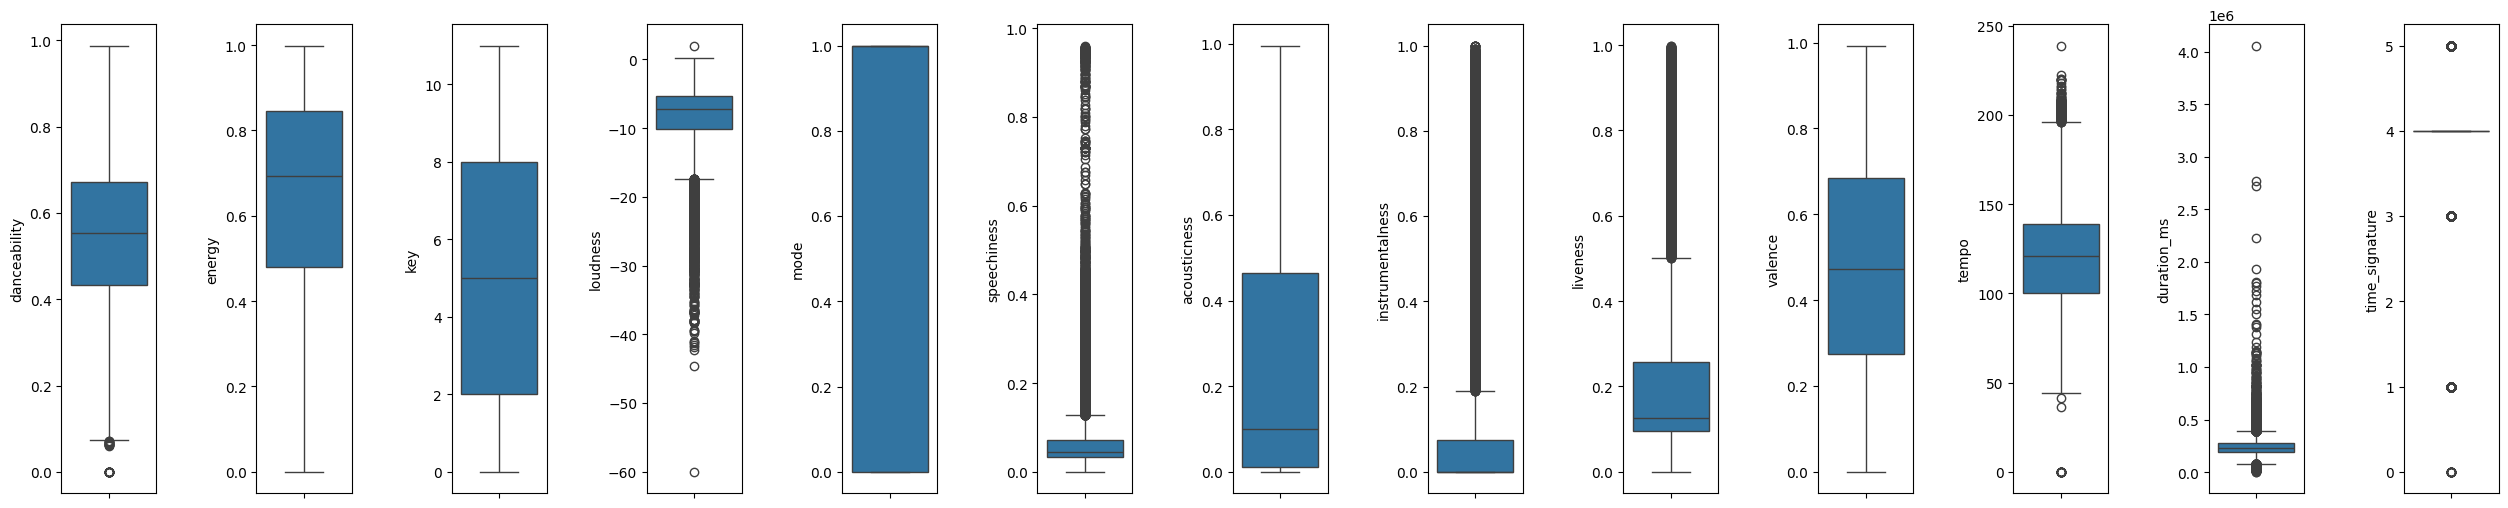

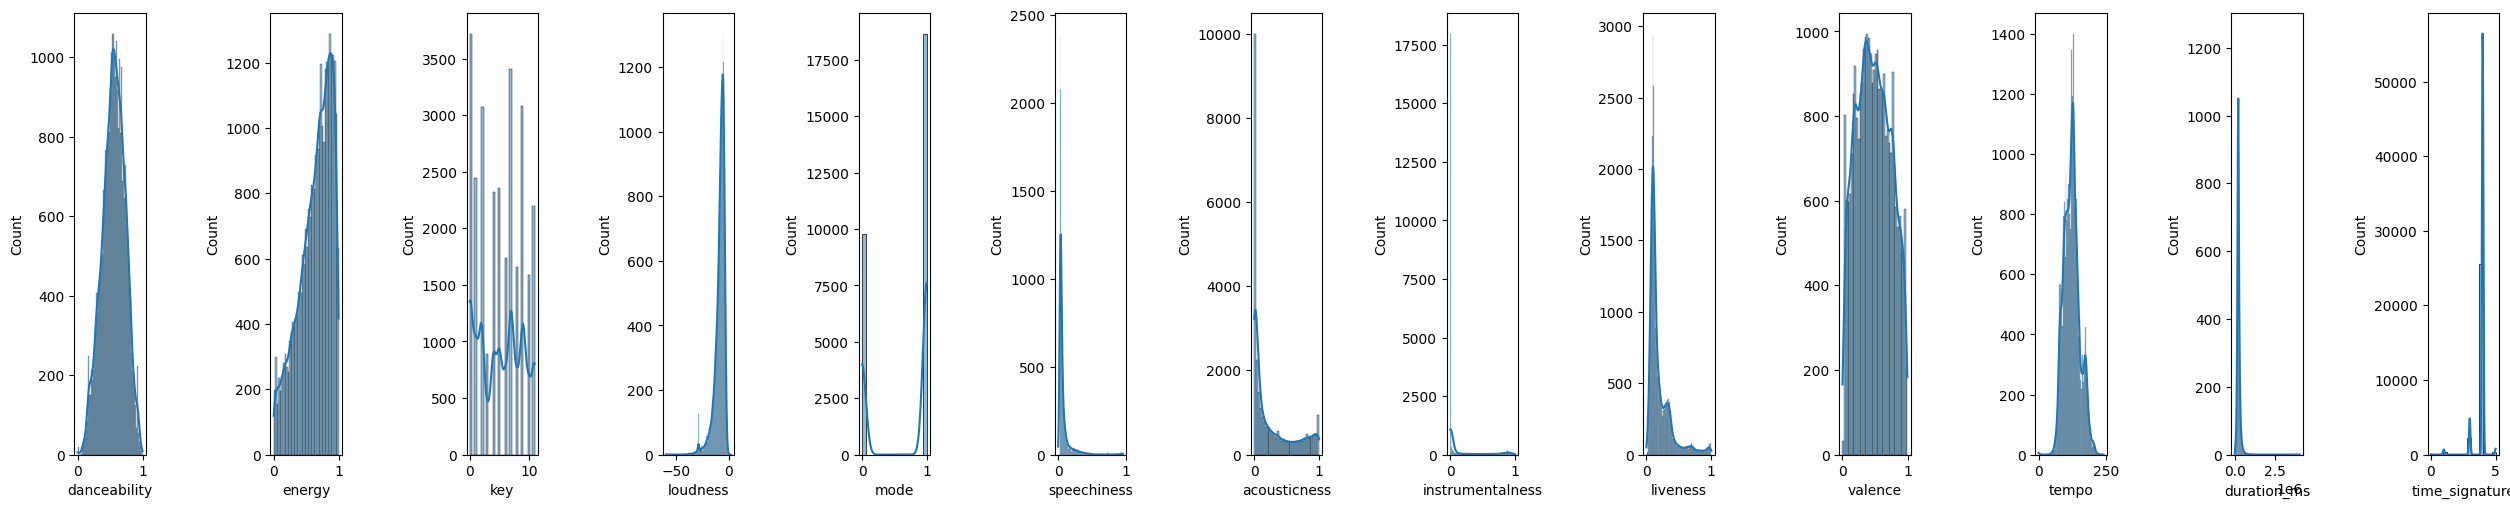

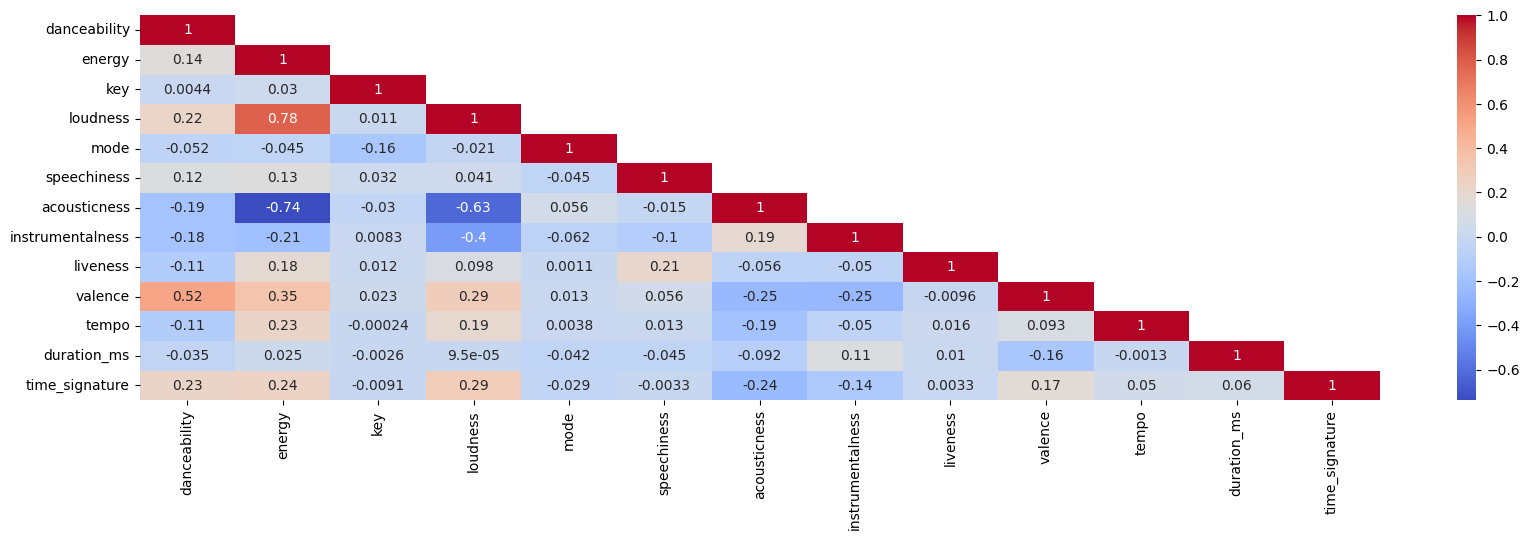

In [6]:
# Spotify Dataset

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

def boxplot(data, columns):
    plt.figure(figsize=(25,5))
    for i, col in enumerate(columns):
        plt.subplot(1,len(columns),i+1)
        sns.boxplot(data[col])
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=5)
    plt.show()

def histplot(data, columns):
    plt.figure(figsize=(25,5))
    for i, col in enumerate(columns):
        plt.subplot(1,len(columns),i+1)
        sns.histplot(data, x=col, kde=True)
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=5)
    plt.show()

def corrmap(data, columns):
    corr = data[columns].corr()
    fig = plt.figure(figsize=(20,5))
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask)
    plt.show()

boxplot(spotify_dataset, columns)
histplot(spotify_dataset, columns)
corrmap(spotify_dataset, columns)

<div class="alert alert-block alert-info">

Data Transformation

</div>

In [7]:
def normalize(numerical_columns, df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])
    # df = pd.DataFrame(columns=numerical_columns, data=x_scaled)
    return df

In [8]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
spotify_dataset = normalize(columns, spotify_dataset)

<div class="alert alert-block alert-info">

<h5><b>3.1.3 Collaborative Filtering based on artist</b></h5>

</div>

To match users based on their interests in artists. Collaborative filtering says that if 2 people like a common artist, they are most likely to like a new artist together, rather than a pair of people with no common liked artist.

In [9]:
def create_user_artist_matrix(data):
    data['interact'] = 1
    user_artist = data.groupby(['user_id_encoded', 'artistname_encoded'])['interact'].max().unstack().fillna(0).astype('int')
    return user_artist

def generate_recommendations(user_id, user_artist, threshold):
    # compute similarity of each user to the provided user
    similarity_users = np.dot(user_artist.loc[user_id], user_artist.transpose())
    similarity_users = pd.DataFrame(similarity_users, columns=['similarity'])
    
    # create similar_user_id column
    # Adding 1 because index starts from 0 in pandas
    similarity_users['similar_user_id'] = similarity_users.index + 1
    
    # Find common artists to apply threshold
    common_artists = find_common_artists(user_id, user_artist)
    
    # Apply threshold
    similarity_users = similarity_users[similarity_users['similar_user_id'].isin([user for user, count in common_artists.items() if count >= threshold])]
 
    # calculate the percentage of similarity
    similarity_users['percentage_similarity'] = similarity_users['similar_user_id'].apply(lambda x: jaccard_similarity(user_id, x, user_artist))
    
    # remove the own user's id
    similarity_users = similarity_users[similarity_users['similar_user_id'] != user_id]
    
    # sort by similarity and then by percentage similarity
    similarity_users.sort_values(by=['similarity', 'percentage_similarity'], ascending=False, inplace=True)
    
    # Remove recommendations that have no similarity
    similarity_users = similarity_users[similarity_users['percentage_similarity'] > 0]
    
    # Get the list of similar user ids for evaluating the algorithm
    recommendations = similarity_users['similar_user_id'].tolist()
    
    precision, recall, f1_score = calculate_metrics(recommendations, common_artists, threshold=5)
    
    similarity_users = similarity_users.assign(similar_user_id=similarity_users['similar_user_id'].apply(lambda x: spotify_dataset.loc[spotify_dataset['user_id_encoded'] == x, 'user_id'].values[0] if x in spotify_dataset['user_id_encoded'].values else x))
    
    return similarity_users, precision, recall, f1_score


def jaccard_similarity(user1, user2, user_artist):
    # print(user1, user2)
    # Get the artists for each user
    artists_user1 = set(user_artist.loc[user1].to_numpy().nonzero()[0])
    artists_user2 = set(user_artist.loc[user2].to_numpy().nonzero()[0])
    # print(artists_user1)
    
    # Calculate the intersection and union of the artists
    intersection = len(artists_user1.intersection(artists_user2))
    union = len(artists_user1.union(artists_user2))
    
    # Calculate Jaccard Similarity
    similarity = intersection / union if union != 0 else 0
    
    return similarity * 100

def find_common_artists(user_id, user_artist):
    # Find the artists that the target user has interacted with
    target_artists = set(user_artist.loc[user_id][user_artist.loc[user_id]==1].index)

    # Create a dictionary to store each user and their count of common artists with the target user
    common_artists = {}

    # Iterate over each user
    for user in user_artist.index:
        if user != user_id:  # Exclude the target user
            # Find the artists that the current user has interacted with
            user_artists = set(user_artist.loc[user][user_artist.loc[user]==1].index)
            
            # Find the common artists between the target user and the current user
            common = target_artists & user_artists
            
            # Store the count of common artists in the dictionary
            common_artists[user] = len(common)

    return common_artists

def calculate_metrics(recommendations, common_artists, threshold):
    # Calculate the number of recommended users
    num_recommended = len(recommendations)

    # Calculate the number of relevant users (i.e., users who have more than 'threshold' artists in common with the target user)
    num_relevant = sum(1 for user, count in common_artists.items() if count >= threshold)

    # Calculate the number of true positives (i.e., relevant users who were also recommended)
    num_true_positives = sum(1 for user in recommendations if common_artists[user] >= threshold)

    # Precision is the proportion of recommended users that are relevant
    precision = num_true_positives / num_recommended if num_recommended else 0

    # Recall is the proportion of relevant users that are recommended
    recall = num_true_positives / num_relevant if num_relevant else 0

    # F1 score is the harmonic mean of precision and recall
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    return precision, recall, f1_score

# Exhaustive search for the optimal value of threshold
def calculate_threshold(user_id):
    user_artist = create_user_artist_matrix(spotify_dataset)
    threshold = 0
    user_artist_count = len(user_artist.loc[user_id][user_artist.loc[user_id]==1])
    for i in range(0, user_artist_count+1):
        user_recommendations, precision, recall, f1_score = generate_recommendations(user_id, user_artist, threshold=threshold)
        if len(user_recommendations) == 0:
            return threshold
        threshold+=1
        
user_artist = create_user_artist_matrix(spotify_dataset)
user_recommendations, precision, recall, f1_score = generate_recommendations(100, user_artist, threshold=10)

# display(user_artist)
print("The 5 most similar users to user_id 100 are: ")
display(user_recommendations.head())
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


The 5 most similar users to user_id 100 are: 


similarity                   similar_user_id  percentage_similarity
54          14  4196c501541cf69a35fabbe7eab83fa7              13.207547
76          11  0a2f45139d5669f13c09670564d299ca               9.166667

Precision: 1.0
Recall: 0.13333333333333333
F1 Score: 0.23529411764705882


<div class="alert alert-block alert-info">

<h5><b>3.1.4 Content-Based Filtering</b></h5>

</div>

In [10]:
def generate_recommendations(user_id, data, feature_values_dict):
    # Aggregate data by user
    data_agg = data[feature_values_dict.keys()].groupby(data['user_id_encoded']).mean()
    
    # Adjust the feature values of the target user
    data_agg.loc[user_id] = list(feature_values_dict.values())
    
    # Calculate the cosine similarity between the user and all other users
    similarity_scores = cosine_similarity(data_agg.loc[user_id].values.reshape(1, -1), data_agg.values)[0]
    
    # Create a DataFrame for the similarity scores
    similarity_df = pd.DataFrame(similarity_scores, columns=['similarity'], index=data_agg.index)
    
    similarity_df.reset_index(inplace=True)

    # Remove the user's own id
    similarity_df = similarity_df[similarity_df['user_id_encoded'] != user_id]
    
    # Sort the users by similarity score
    similarity_df.sort_values(by='similarity', ascending=False, inplace=True)
    
    # Calculate percentages of similarity
    similarity_df['similarity_percentage'] = similarity_df['similarity'] * 100
    
    recommended_users = similarity_df['user_id_encoded'].tolist()
    
    precision, recall, f1_score = calculate_metrics(recommended_users, data, feature_values_dict)
    
    return similarity_df, precision, recall, f1_score


def calculate_metrics(recommended_users, data, user_features):
    tp = 0
    fp = 0
    fn = 0

    for user in recommended_users:
        # Calculate the aggregate of their song features
        similar_user_features = data[data['user_id_encoded'] == user].mean(numeric_only=True)[:-3].to_dict()

        # Compare that to the user_features
        is_relevant = all(similar_user_features[feature] >= user_features[feature] for feature in user_features)

        if is_relevant:
            tp += 1
        else:
            fp += 1
    fn = len(recommended_users) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

user_id = 100
# user_features = spotify_dataset[spotify_dataset['user_id_encoded'] == 100].mean(numeric_only=True)[:-3].to_dict()
# display(user_features)

user_features = {
    'danceability': 0.0,
    'energy': 0.0,
    'key': 0.0,
    'loudness': 0.0,
    'mode': 0.0,
    'speechiness': 0.0,
    'acousticness': 0.0,
    'instrumentalness': 0.0,
    'liveness': 0.0,
    'valence': 0.0,
    'tempo': 0.0,
    'duration_ms': 0.09,
    'time_signature': 0.8
}

# normalize dataset so that all features are in same scale
spotify_dataset = normalize(columns, spotify_dataset)
# display(spotify_dataset.head())

cosine_sim_df, precision, recall, f1_score = generate_recommendations(100, spotify_dataset, user_features)
display(cosine_sim_df.head(), len(cosine_sim_df))
# You can use this function like this:

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

user_id_encoded  similarity  similarity_percentage
195              196    0.111819              11.181945
81                82    0.111818              11.181754
128              129    0.111817              11.181702
109              110    0.111816              11.181614
125              126    0.111816              11.181578

249

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


<div class="alert alert-block alert-warning">

<h3><center><b>3.2 Song Popularity</b></h3>

<div class="alert alert-block alert-info">

<h5><b>3.1.1 EDA</b></h5>

</div>

<div class="alert alert-block alert-info">
Loading the dataset</div>

In [11]:
song_path = r'spotifydata.csv'
song_data = pd.read_csv(song_path)

In [12]:
print("EDA:")
print('\nSong Data:')
display(song_data.head())
print("Length of song dataset:", len(song_data))
display(song_data.describe())
display(song_data.isna().sum())
display(pd.DataFrame({'Column': song_data.columns, 'DType': [song_data[col].dtype for col in song_data.columns], 'NUniques': [song_data[col].nunique() for col in song_data.columns]}))

EDA:

Song Data:


genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

Length of song dataset: 232725


popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Column    DType  NUniques
0              genre   object        27
1        artist_name   object     14564
2         track_name   object    148614
3           track_id   object    176774
4         popularity    int64       101
5       acousticness  float64      4734
6       danceability  float64      1295
7        duration_ms    int64     70749
8             energy  float64      2517
9   instrumentalness  float64      5400
10               key   object        12
11          liveness  float64      1732
12          loudness  float64     27923
13              mode   object         2
14       speechiness  float64      1641
15             tempo  float64     78512
16    time_signature   object         5
17           valence  float64      1692



<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.2.2 Pre-processing</b></h5>

</div>

In [13]:
#  Retrieve the keys present in the song_data dictionary
song_data.keys()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

<div class="alert alert-block alert-info">
Checking Missing Values</div>

In [14]:
song_data.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

<div class="alert alert-block alert-info">
Data Visualization</div>



C:\Users\ariha\AppData\Local\Temp\ipykernel_19368\3871686646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_data['popularity']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'Popularity Distribution')

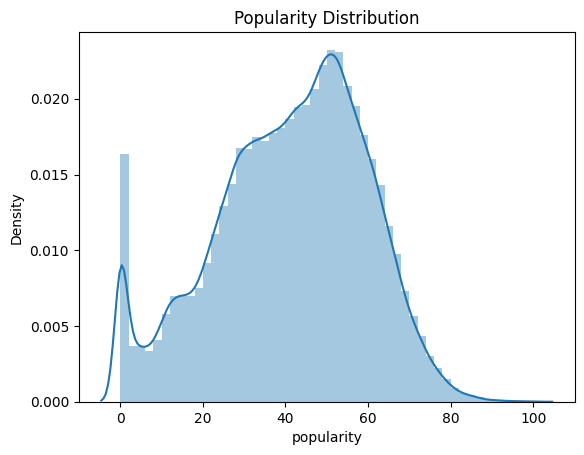

In [15]:
sns.distplot(song_data['popularity']).set_title('Popularity Distribution')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is to plot the distribution plot (distplot) for the 'popularity' column. Using this, we are visualizing the distribution of popularity scores among the songs.
</div>

Visualizing Correlation Among Song Data Features Using Heatmap

In [16]:
correlation = song_data.corr()
fig = plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)
sns.heatmap(correlation, annot=True, cmap="coolwarm", mask=mask)
plt.show()

ValueError: could not convert string to float: 'Movie'

Visualization of Popularity Based on Time Signature

In [ ]:
sns.barplot(x = 'time_signature', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Time Signature')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to showcase the relationship between the time signature of songs and their respective popularity levels
</div>

Popularity Distribution Across Different Musical Keys

In [ ]:
sns.barplot(x = 'key', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Key')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to show how popularity varies across different musical keys, mainly to understand relationships between key and music popularity.
</div>

Popularity Based on Musical Mode

In [ ]:
sns.barplot(x = 'mode', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Mode')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to show the relationship between musical mode and song popularity
</div>

Distribution of Acousticness in Songs with Popularity Above 70

In [ ]:
popular_songs = song_data[song_data.popularity > 70]
sns.distplot(popular_songs['acousticness'])
plt.title('Acoustiness for Songs with More than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code filters songs with a popularity score above 70 from the dataset and visualization is performed specifically for acousticness
</div>

Distribution of Acousticness in Songs with Popularity Below 70

In [ ]:
unpopular_songs = song_data[song_data.popularity < 70]
sns.distplot(unpopular_songs['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code filters songs with a popularity score below 70 from the dataset and visualization is performed specifically for acousticness
</div>

Distribution of Loudness for Highly Popular Songs

In [ ]:
sns.distplot(popular_songs['loudness'])
plt.title('Loudness for Songs with More than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Visualizing the distribution of loudness for songs with a popularity above 70, giving information about the loudness patterns within the list of highly popular songs.
</div>

Distribution of Loudness for Less Popular Songs

In [ ]:
unpopular_songs = song_data[song_data.popularity < 70]
sns.distplot(unpopular_songs['loudness'])
plt.title('Loudness for Songs with Less than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Visualizing the distribution of loudness for songs with a popularity below 70, giving information about the loudness patterns within the list of less popular songs.
</div>

<div class="alert alert-block alert-info">
<b>Data Preparation</b> </div>



Encoding Categorical Keys in Song Data

In [ ]:
unique_keys = song_data['key'].unique()
for i in range(len(unique_keys)):
    song_data.loc[song_data['key'] == unique_keys[i], 'key'] = i
song_data.sample(5)

Mapping Time Signatures to Numerical Categories in Song Data

In [ ]:
time_sign = song_data['time_signature'].unique()
for i in range(len(time_sign)):
    song_data.loc[song_data['time_signature'] == time_sign[i], 'time_signature'] = i
song_data.sample(5)

Converting Musical Modes to Numerical Representation



In [ ]:
song_data.loc[song_data["mode"] == 'Major', "mode"] = 1
song_data.loc[song_data["mode"] == 'Minor', "mode"] = 0
song_data.sample(5)

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Transforming categorical labels 'Major' and 'Minor' to numerical representations '1' and '0' respectively.
</div>



Binary Classification of Song Popularity

In [ ]:
song_data.loc[song_data['popularity'] < 70, 'popularity'] = 0 
song_data.loc[song_data['popularity'] >= 70, 'popularity'] = 1
song_data.loc[song_data['popularity'] == 1]

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Transforming 'popularity' column into a binary classification by setting unpopular songs (below 70) to 0 and popular songs (above 70) to 1. The final line includes only songs marked as highly popular (assigned a value of 1).
- It is our threshold that we consider only songs above 70 as popular songs and those below 70 as unpopular songs
</div>

<div class="alert alert-block alert-info">

<h5><b>3.2.3 Model Building and Training</b></h5>

</div>


Feature Selection

In [ ]:
song_features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]



<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.
</div>


In [ ]:
training = song_data.sample(frac = 0.8,random_state = 420)
X_train = training[song_features]
y_train = training['popularity']
X_test = song_data.drop(training.index)[song_features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

#### <div class="alert alert-block alert-danger"> <b>Model 1: </b> Logistic Regression </div>

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_valid)
lr_accuracy = accuracy_score(y_valid, lr_y_pred)
print("Accuracy: " + str(lr_accuracy))

lr_auc = roc_auc_score(y_valid, lr_y_pred) 
print("AUC: " + str(lr_auc))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_valid, lr_y_pred)
conf_matrix = confusion_matrix(y_valid, lr_y_pred)
precision = precision_score(y_valid, lr_y_pred, average='weighted')
recall = recall_score(y_valid, lr_y_pred, average='weighted')
f1 = f1_score(y_valid, lr_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

lr_y_pred_proba = lr_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, lr_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 2: </b> Decision Tree Classifier </div>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_valid)
dt_accuracy = accuracy_score(y_valid, dt_y_pred)
print("Accuracy: " + str(dt_accuracy))

dt_auc = roc_auc_score(y_valid, dt_y_pred) 
print("AUC: " + str(dt_auc))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_valid, dt_y_pred)
conf_matrix = confusion_matrix(y_valid, dt_y_pred)
precision = precision_score(y_valid, dt_y_pred, average='weighted')
recall = recall_score(y_valid, dt_y_pred, average='weighted')
f1 = f1_score(y_valid, dt_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_y_pred_proba = dt_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, dt_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 3: </b> Random Forest Classifier </div>

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_y_pred)
print("Accuracy: " + str(rf_accuracy))

rf_auc = roc_auc_score(y_valid, rf_y_pred) 
print("AUC: " + str(rf_auc))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_valid, rf_y_pred)
conf_matrix = confusion_matrix(y_valid, rf_y_pred)
precision = precision_score(y_valid, rf_y_pred, average='weighted')
recall = recall_score(y_valid, rf_y_pred, average='weighted')
f1 = f1_score(y_valid, rf_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_y_pred_proba = rf_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, rf_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 4: </b> K-Nearest Neighbors Classifier </div>

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_valid)
knn_accuracy = accuracy_score(y_valid, knn_y_pred)
print("Accuracy: " + str(knn_accuracy))

knn_auc = roc_auc_score(y_valid, knn_y_pred) 
print("AUC: " + str(knn_auc))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_valid, knn_y_pred)
conf_matrix = confusion_matrix(y_valid, knn_y_pred)
precision = precision_score(y_valid, knn_y_pred, average='weighted')
recall = recall_score(y_valid, knn_y_pred, average='weighted')
f1 = f1_score(y_valid, knn_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

knn_y_pred_proba = knn_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, knn_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 5: </b> SVM with Linear Kernel </div>

Since linear SVM is O(n^3), and the training dataset is large, it would take a lot of operations to train the model. Therefore we will only use 10000 datapoints total.

In [ ]:
svm_train = training.sample(10000)
svm_X_train = svm_train[song_features]
svm_y_train = svm_train['popularity']
svm_X_test = song_data.drop(svm_train.index)[song_features]
svm_X_train, X_valid_LSVC, svm_y_train, svm_y_valid = train_test_split(svm_X_train, svm_y_train, test_size = 0.2, random_state = 420)

In [ ]:
svm_model = DecisionTreeClassifier()
svm_model.fit(svm_X_train, svm_y_train)
svm_y_pred = svm_model.predict(X_valid_LSVC)
svm_accuracy = accuracy_score(svm_y_valid, svm_y_pred)
print("Accuracy: " + str(svm_accuracy))

svm_auc = roc_auc_score(svm_y_valid, svm_y_pred) 
print("AUC: " + str(svm_auc))

In [ ]:
accuracy = accuracy_score(svm_y_valid, svm_y_pred)
conf_matrix = confusion_matrix(svm_y_valid, svm_y_pred)
precision = precision_score(svm_y_valid, svm_y_pred, average='weighted')
recall = recall_score(svm_y_valid, svm_y_pred, average='weighted')
f1 = f1_score(svm_y_valid, svm_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

svm_y_pred_proba = svm_model.predict_proba(X_valid_LSVC)[:, 1]

fpr, tpr, thresholds = roc_curve(svm_y_valid, svm_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.show()





#### <div class="alert alert-block alert-danger"> <b>Model 6: </b> Feedforward Neural Network </div>

In [ ]:
nn_model = Sequential()

nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

eval_metrics = nn_model.evaluate(X_valid, y_valid)
print(f"Accuracy: {eval_metrics[1]}")

nn_y_pred = nn_model.predict(X_valid)

nn_auc = roc_auc_score(y_valid, nn_y_pred)
print(f"AUC: {nn_auc}")

In [ ]:
nn_y_pred_proba = nn_model.predict(X_valid)

fpr, tpr, thresholds = roc_curve(y_valid, nn_y_pred_proba)
nn_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

<div class="alert alert-block alert-info">
<b>Model Performance</b></div>


In [ ]:
model_performance_accuracy = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
    'Accuracy': [lr_accuracy, rf_accuracy, knn_accuracy, dt_accuracy, svm_accuracy]
})

model_performance_AUC = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
    'AUC': [lr_auc, rf_auc, knn_auc, dt_auc, svm_auc]
})


In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

<div class="alert alert-block alert-success">
<b>Results</b> 

- We looked at data from songs on Spotify. We used details like the music's key, mood, and dance style to guess how popular a song might be (if it's rated higher than 70 out of 100) and didn't rely on things like the artist's name, music type, or when the song was released.

- The best method we used was the Random Forest Classifier. It guessed accurately about 98 out of 100 times and scored about 84 out of 100 when measuring its performance. The next best method was the Decision Tree Classifier. It got it right about 96 out of 100 times and scored around 84 out of 100 in its performance.

</div>



<div class="alert alert-block alert-warning">

<h3><center><b>3.3 Song Clustering & Exploration</b></h3>

<div class="alert alert-block alert-info">

<h5><b>3.3.1 EDA</b></h5>

</div>

<div class="alert alert-block alert-info">
Loading the dataset</div>

In [17]:
spotify_dataset_path = r'result_spotify_dataset.csv'

spotify_dataset = pd.read_csv(spotify_dataset_path)
display(spotify_dataset.head())
display(spotify_dataset.describe())
display(spotify_dataset.isna().sum())

user_id   artistname        trackname  \
0  c1a6910ecac9fd5e5348326675fb6ca6  Jon Hopkins   Abandon Window   
1  c1a6910ecac9fd5e5348326675fb6ca6      Grouper         Clearing   
2  c1a6910ecac9fd5e5348326675fb6ca6   Com Truise           Closed   
3  c1a6910ecac9fd5e5348326675fb6ca6    Radiohead            Codex   
4  c1a6910ecac9fd5e5348326675fb6ca6  Nina Simone  Cotton Eyed Joe   

  playlistname                 song_id  danceability  energy  key  loudness  \
0        CHILL  5BKp7nLEzAtazOxYla2sBr         0.063  0.1730  6.0   -26.199   
1        CHILL  3IL43TRkEnh4buGOZ1Brb5         0.230  0.0432  6.0   -23.066   
2        CHILL  1z2iz13gYpqnH4IwUQsSLx         0.623  0.5200  2.0    -7.926   
3        CHILL  6ttYF5VadzTssGV2i1Q08T         0.346  0.1280  2.0   -17.536   
4        CHILL  3d5Mw0esNjnh123xyy48IF         0.421  0.0820  0.0   -18.893   

   mode  ...  instrumentalness  liveness  valence    tempo            type  \
0   1.0  ...          0.836000    0.0863   0.1120   68.963  audio_features   
1   1.0  ...          0.932000    0.1050   0.1360   89.582  audio_features   
2   1.0  ...          0.839000    0.0899   0.1720  172.051  audio_features   
3   0.0  ...          0.760000    0.1300   0.0654   58.996  audio_features   
4   1.0  ...          0.000209    0.1280   0.2040   72.529  audio_features   

   duration_ms time_signature  \
0     297493.0            3.0   
1     281680.0            4.0   
2     184000.0            4.0   
3     287067.0            4.0   
4     171280.0            4.0   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5BKp...   
1  https://api.spotify.com/v1/audio-analysis/3IL4...   
2  https://api.spotify.com/v1/audio-analysis/1z2i...   
3  https://api.spotify.com/v1/audio-analysis/6ttY...   
4  https://api.spotify.com/v1/audio-analysis/3d5M...   

                                    uri                      id  
0  spotify:track:5BKp7nLEzAtazOxYla2sBr  5BKp7nLEzAtazOxYla2sBr  
1  spotify:track:3IL43TRkEnh4buGOZ1Brb5  3IL43TRkEnh4buGOZ1Brb5  
2  spotify:track:1z2iz13gYpqnH4IwUQsSLx  1z2iz13gYpqnH4IwUQsSLx  
3  spotify:track:6ttYF5VadzTssGV2i1Q08T  6ttYF5VadzTssGV2i1Q08T  
4  spotify:track:3d5Mw0esNjnh123xyy48IF  3d5Mw0esNjnh123xyy48IF  

[5 rows x 22 columns]

danceability        energy           key      loudness          mode  \
count  28469.000000  28469.000000  28469.000000  28469.000000  28469.000000   
mean       0.546875      0.641947      5.186132     -8.442115      0.655836   
std        0.172200      0.247924      3.570595      4.843543      0.475103   
min        0.000000      0.000000      0.000000    -60.000000      0.000000   
25%        0.432000      0.481000      2.000000    -10.119000      0.000000   
50%        0.554000      0.693000      5.000000     -7.226000      1.000000   
75%        0.671000      0.845000      8.000000     -5.293000      1.000000   
max        0.988000      0.999000     11.000000      2.017000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  28469.000000  28469.000000      28469.000000  28469.000000   
mean       0.076269      0.266104          0.150150      0.202869   
std        0.098086      0.320394          0.294507      0.180680   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.033900      0.010300          0.000000      0.095600   
50%        0.044100      0.101000          0.000271      0.127000   
75%        0.071900      0.464000          0.075700      0.258000   
max        0.961000      0.996000          1.000000      0.999000   

            valence        tempo   duration_ms  time_signature  
count  28469.000000  28469.00000  2.846900e+04     28469.00000  
mean       0.480868    121.76861  2.438535e+05         3.89824  
std        0.254482     28.67606  9.741088e+04         0.43739  
min        0.000000      0.00000  3.329000e+03         0.00000  
25%        0.275000    100.42200  1.960000e+05         4.00000  
50%        0.473000    120.85000  2.317730e+05         4.00000  
75%        0.684000    138.70400  2.737330e+05         4.00000  
max        0.993000    238.89500  4.057195e+06         5.00000

user_id             0
artistname          0
trackname           0
playlistname        0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
analysis_url        0
uri                 0
id                  0
dtype: int64


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.3.2 Pre-processing</b></h5>

</div>

<div class="alert alert-block alert-info">

Feature selection & encoding

</div>

In [18]:
selected_features = ['danceability', 'energy', 'valence']
X = spotify_dataset[selected_features]

<div class="alert alert-block alert-info">

Data Transformation

</div>

In [19]:
# Apply UMAP for dimensionality reduction to 2 components
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X)


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We performed dimensionality reduction using UMAP (Uniform Manifold Approximation and Projection) to condense the data into two components. Initially, we selected specific features ('danceability', 'energy', 'valence') from the Spotify dataset. Then, the UMAP algorithm was employed with two components to transform and represent this data in a two-dimensional space, making it easier to visualize and analyze.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.3.3 Model Development and Training</b></h5>

</div>

<div class="alert alert-block alert-info">
Applying K-means to cluster songs based on their audio features

In [20]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
spotify_dataset['cluster'] = kmeans.labels_


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- <b>Standardization:</b> The data is adjusted to have a mean of 0 and a standard deviation of 1 for each feature using StandardScaler from scikit-learn.
- <b>K-Means Clustering:</b> The standardized data is grouped into five clusters using the K-Means algorithm, which aims to partition the data into groups based on similarity.
- <b>Cluster Labeling:</b> The cluster labels obtained from K-Means are added to the Spotify dataset, allowing each data point to be assigned to a specific cluster
</div>

<div class="alert alert-block alert-info">

<h5><b>3.3.4 Analysis</b></h5>

</div>

<div class="alert alert-block alert-info">

Vizualizing the clusters obtained after applying K-means

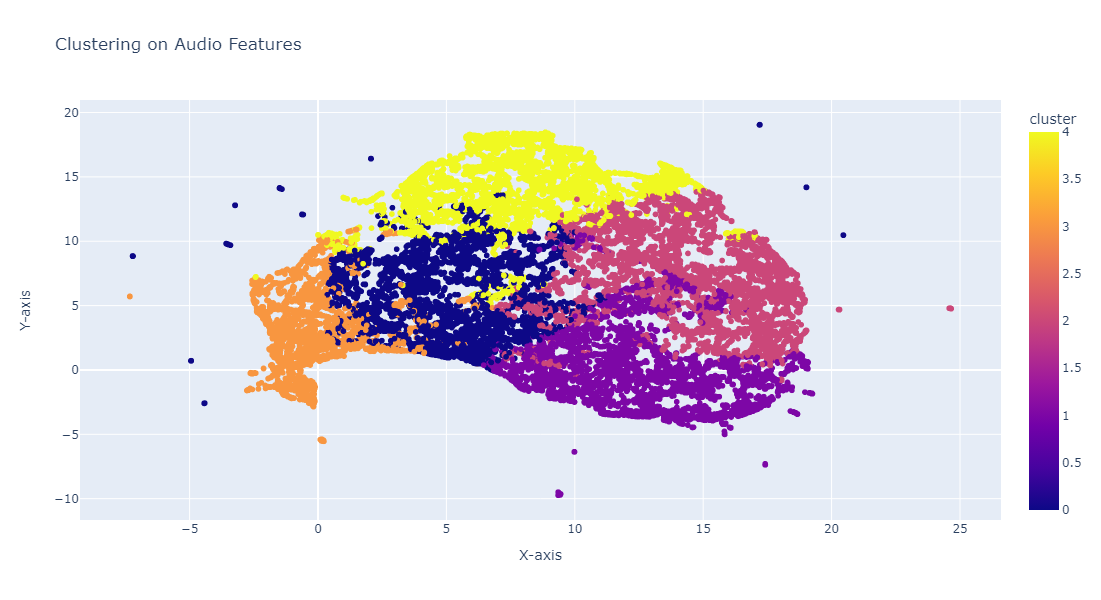

In [21]:
fig = px.scatter(
    spotify_dataset,
    x=embedding[:, 0],
    y=embedding[:, 1],
    color='cluster',
    hover_data={'trackname': True},
    title='Clustering on Audio Features'
)
fig.update_layout(
    width=800,  # Set width in pixels
    height=600,
    xaxis_title='X-axis', 
    yaxis_title='Y-axis'
)

fig.show()


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- <b>Song Clustering:</b> Clustering songs based on their audio features using the K-means algorithm. This algorithm groups songs together based on similarities in their attributes such as danceability, energy, valence, etc.
- <b>Visualization:</b> The visualization represents the clustered songs in a two-dimensional space (x and y axes) generated by UMAP (Uniform Manifold Approximation and Projection). Each song is plotted as a point, where the x and y coordinates are derived from the UMAP algorithm. The color of each point corresponds to its assigned cluster label.
- <b>Interactive Exploration:</b> Users can explore the songs within each cluster by hovering over the points. Additional information such as the track name ('trackname') is displayed when hovering over a specific point.

The scatter plot provides an overview of how songs are grouped together based on their audio features. Each point represents a song, and the clustering helps to identify similar songs that share common audio characteristics. The visualization aims to assist users in exploring and understanding patterns within the song dataset, enabling a visual analysis of song clusters.
</div>

<div class="alert alert-block alert-info">
<b>References:</b>

1. Halilovic, I. (2021, July 30). Markdown for Jupyter notebooks cheatsheet - Inge Halilovic - Medium. Medium. https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
2. Scribbr. (2021, July 30). Free APA citation Generator | with Chrome Extension - Scribbr. https://www.scribbr.com/citation/generator/apa/
3. Zach. (2023). How to create a distribution plot in Matplotlib. Statology. https://www.statology.org/matplotlib-distribution-plot/
4. seaborn.displot — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.displot.html
5. Lau, C. H. (2021, December 7). 5 steps of a Data Science Project Lifecycle - towards Data Science. Medium. https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
6. Are hit songs becoming less musically diverse? (n.d.). The Pudding. https://pudding.cool/2018/05/similarity/
7. Nasreldin, M. (2018, July 2). Song Popularity Predictor - towards Data science. Medium. https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
8. Seaborn.Heatmap — seaborn 0.13.0 documentation. (n.d.). Pydata.org. Retrieved October 3, 2023. https://seaborn.pydata.org/generated/seaborn.heatmap.html
9. IBM documentation. (2021, April 8). Ibm.com. https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooksmarkdown-jupyter-cheatsheet
10. Spotify Tracks DB. (2019, July 23). Kaggle. https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv
</div>